In [2]:
install.packages("ROCR")

also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’, ‘gplots’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
install.packages("PerformanceAnalytics")

also installing the dependency ‘quadprog’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library(tidyverse) 
library(readr)
library(caret)
library(dplyr)
library(ROCR)
library(corrplot)
library(ggplot2)
library(corrgram)
library(car)
library(PerformanceAnalytics)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:gplots’:

    textplot

The following object is masked from ‘package:graphics’:

    legend



In [12]:
data = read.csv('../Downloads/data_breast_kaggle.csv', header=T)

str(data)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

In [13]:
cancer <- data[,-c(1,33)]
head(cancer)

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [14]:
cancer$diagnosis <- factor(ifelse(cancer$diagnosis=="B","Benign","Malignant"))
head(cancer)
table(cancer$diagnosis)

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
Malignant,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440



   Benign Malignant 
      357       212 

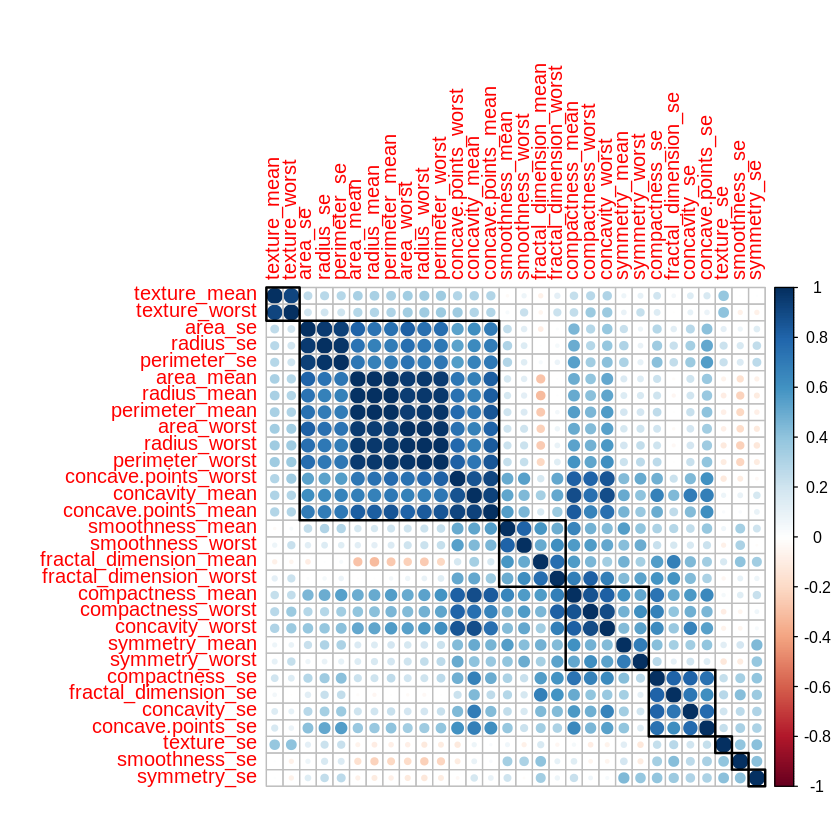

In [15]:
correlation <- cor(cancer[,-1])
corrplot(correlation, order = "hclust", tl.cex = 1, addrect = 8)
#chart.Correlation(cancer[,-1], histogram=TRUE, col="grey10", pch=1, main="Cancer Correlations")

In [16]:
highCorr <- findCorrelation(correlation, cutoff = .70)
print("Variables with highly correlations will be removed");highCorr
colnames(cancer[,highCorr])

[1] "Variables with highly correlations will be removed"


[1]  7  8  6 28 27 23 21  3 26 24  1 13 11 18 16 14 17  5 10 22

[1] "compactness_mean"       "concavity_mean"         "smoothness_mean"       
 [4] "concavity_worst"        "compactness_worst"      "texture_worst"         
 [7] "fractal_dimension_se"   "texture_mean"           "smoothness_worst"      
[10] "perimeter_worst"        "diagnosis"              "texture_se"            
[13] "fractal_dimension_mean" "concavity_se"           "smoothness_se"         
[16] "perimeter_se"           "compactness_se"         "area_mean"             
[19] "symmetry_mean"          "radius_worst"

In [17]:
#we have highly correlated predictors to be removed
cancer_refine <- cancer[, -highCorr]
cancer_refine$diagnosis <- cancer$diagnosis
colnames(cancer_refine)
dim(cancer_refine)
head(cancer_refine)

[1] "radius_mean"             "perimeter_mean"         
 [3] "concave.points_mean"     "radius_se"              
 [5] "area_se"                 "concave.points_se"      
 [7] "symmetry_se"             "area_worst"             
 [9] "concave.points_worst"    "symmetry_worst"         
[11] "fractal_dimension_worst" "diagnosis"

[1] 569  12

radius_mean,perimeter_mean,concave.points_mean,radius_se,area_se,concave.points_se,symmetry_se,area_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
17.99,122.80,0.14710,1.0950,153.40,0.01587,0.03003,2019.0,0.2654,0.4601,0.11890,Malignant
20.57,132.90,0.07017,0.5435,74.08,0.01340,0.01389,1956.0,0.1860,0.2750,0.08902,Malignant
19.69,130.00,0.12790,0.7456,94.03,0.02058,0.02250,1709.0,0.2430,0.3613,0.08758,Malignant
11.42,77.58,0.10520,0.4956,27.23,0.01867,0.05963,567.7,0.2575,0.6638,0.17300,Malignant
20.29,135.10,0.10430,0.7572,94.44,0.01885,0.01756,1575.0,0.1625,0.2364,0.07678,Malignant
12.45,82.57,0.08089,0.3345,27.19,0.01137,0.02165,741.6,0.1741,0.3985,0.12440,Malignant


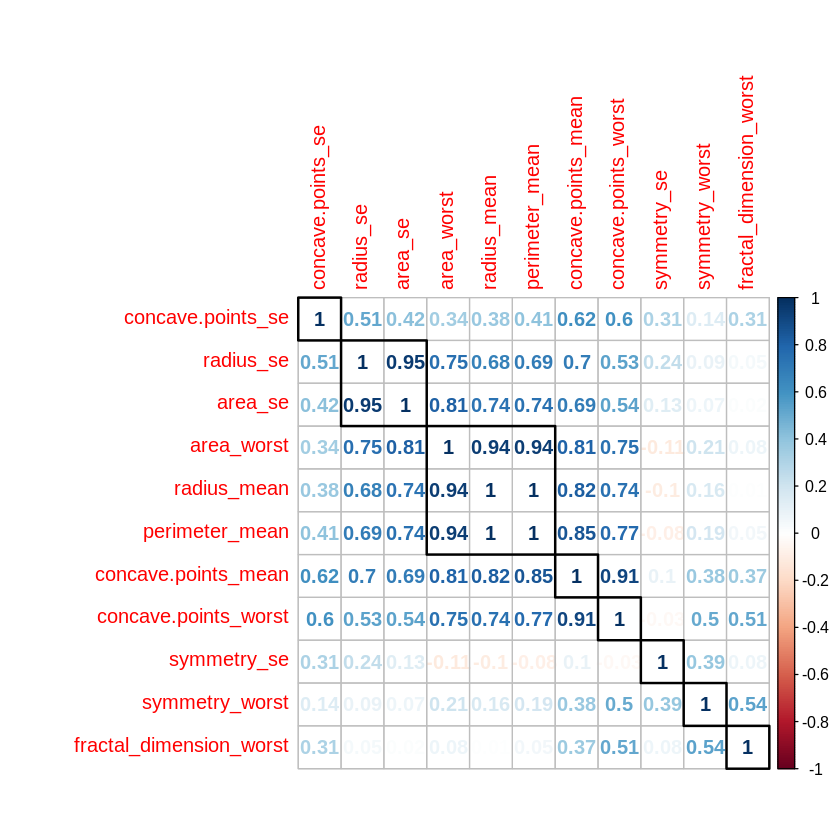

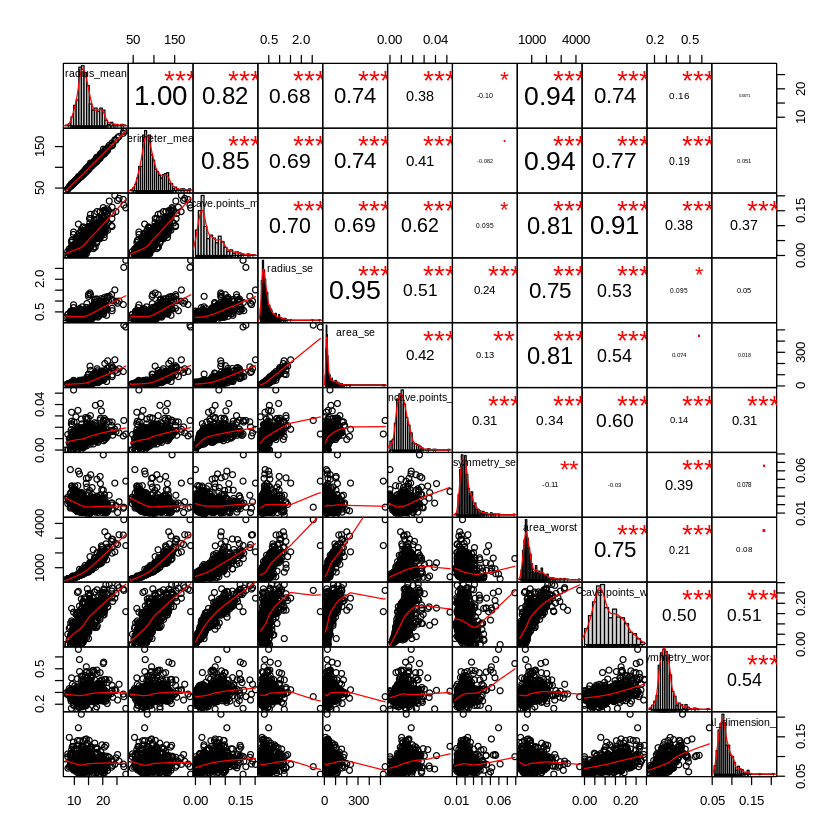

In [18]:
correlation <- cor(cancer_refine[,-12])
corrplot(correlation, order = "hclust",method="number" ,tl.cex = 1, addrect = 8)
chart.Correlation(cancer_refine[, -12], histogram=TRUE, col="grey10", pch=19, main="Cancer Correlations")

In [19]:
# splitting dataset
a <- createDataPartition(cancer$diagnosis, p = 0.8, list=FALSE)
training <- cancer[a,]
testing <- cancer[-a,]
dim(training)
dim(testing)
b <- createDataPartition(cancer_refine$diagnosis,p=0.8,list=FALSE)
training_refine <- cancer_refine[b,]
testing_refine <- cancer_refine[-b,]
dim(training_refine)
dim(testing_refine)

[1] 456  31

[1] 113  31

[1] 456  12

[1] 113  12

In [29]:
install.packages("rattle")

also installing the dependency ‘XML’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


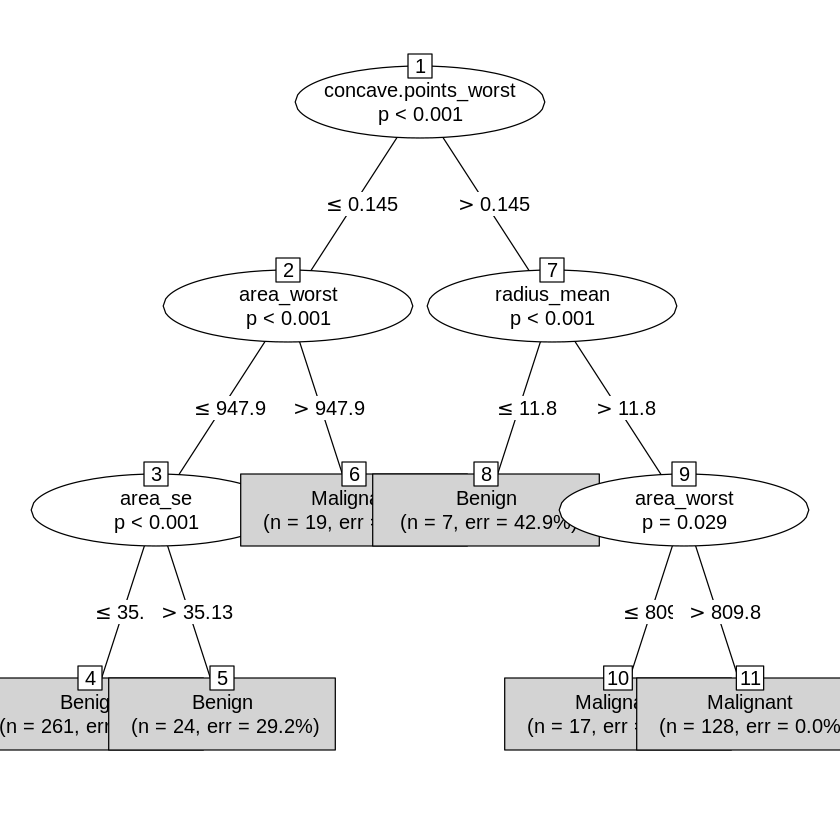

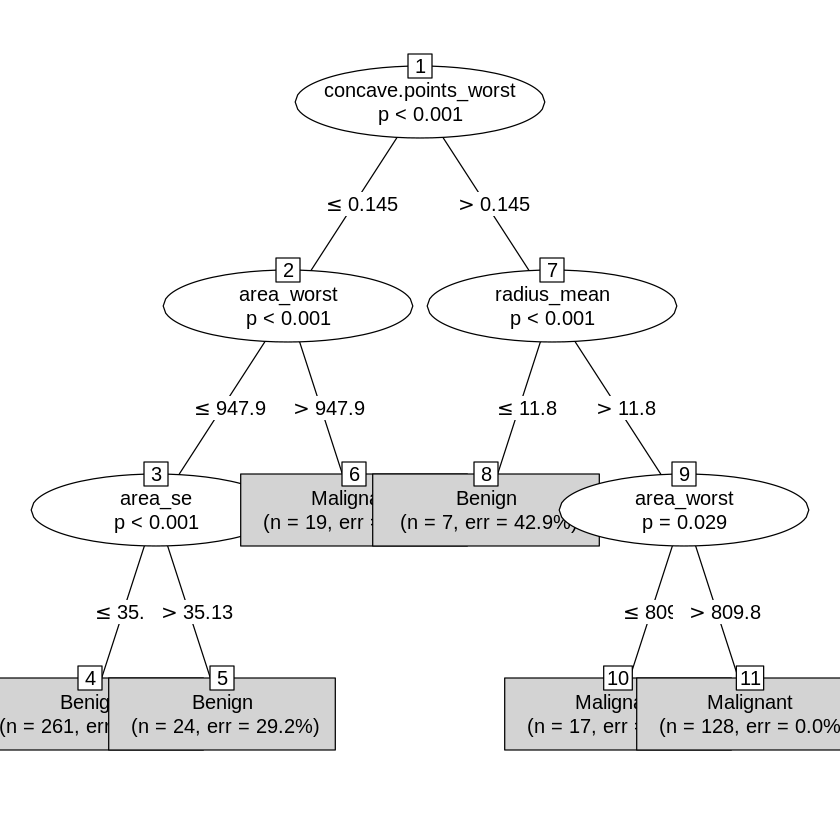

In [30]:
library(party)
library(partykit)
library(rpart)
library(rpart.plot)
library(RColorBrewer)
library(rattle)
#create our formula

#build our model
# Create the tree.
output.tree <- ctree(diagnosis~., data = training_refine)
plot(as.simpleparty(output.tree))
# Plot the tree.
plot(output.tree, type="simple")
#fancyRpartPlot(output.tree)

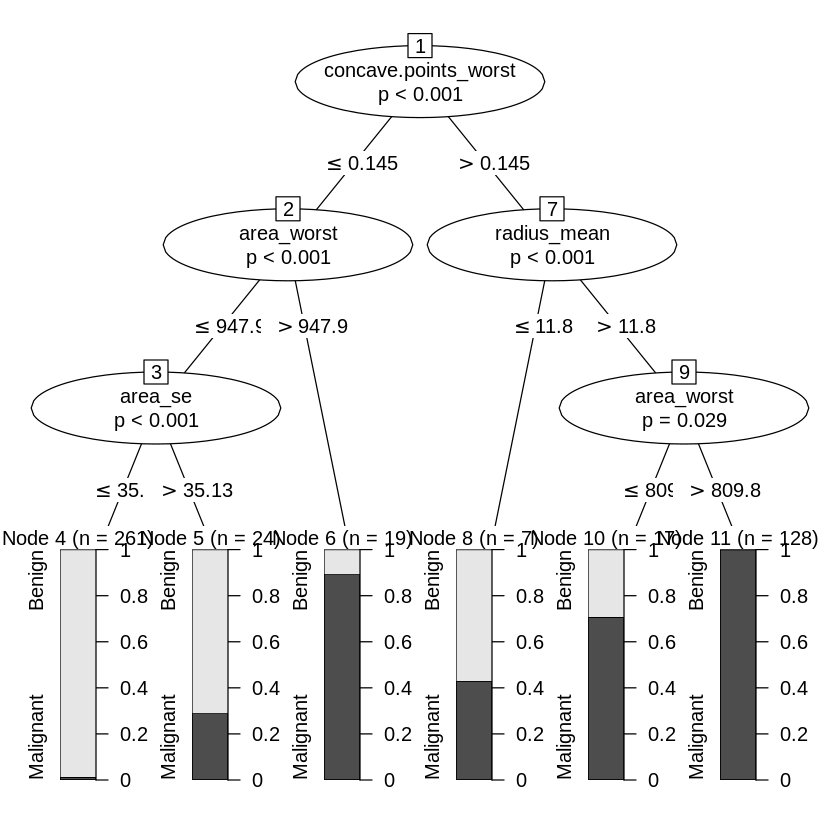

In [31]:
ctree.party <- ctree(diagnosis~., data=training_refine)
plot(ctree.party)

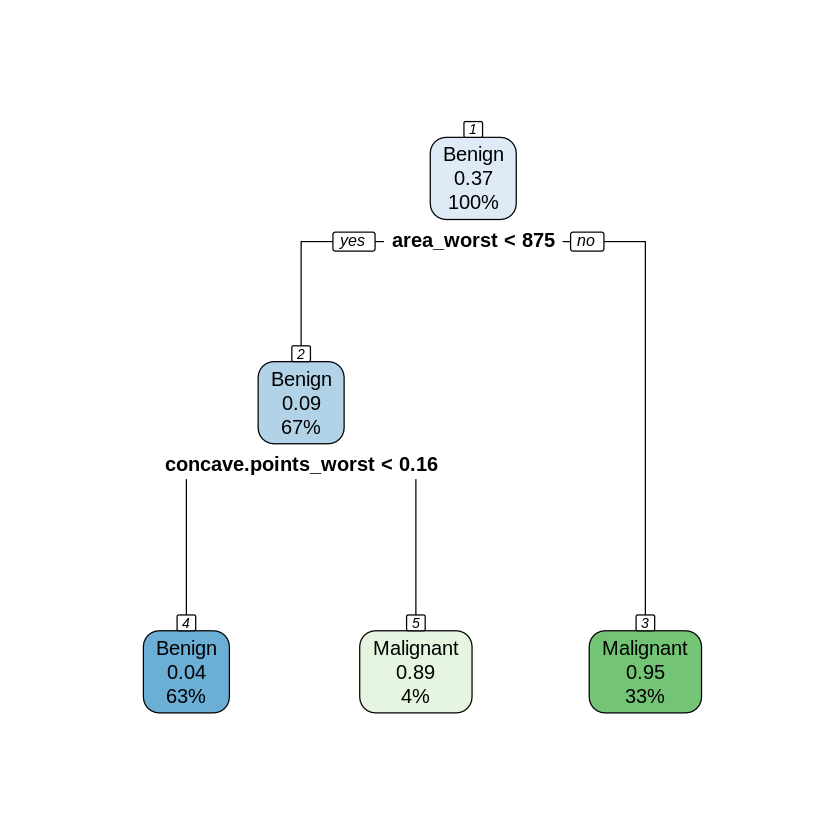

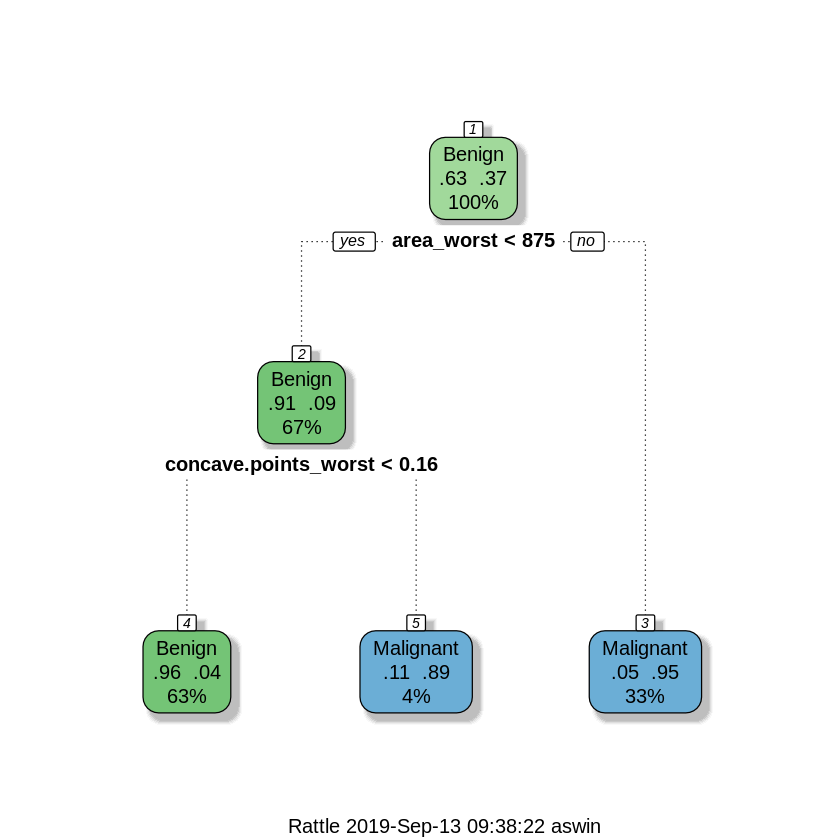

In [32]:
#build a Decision Tree by using the rpart  
#(Recursive Partitioning And Regression Trees) algorithm:
# building the classification tree with rpart
library(rpart)
library(rpart.plot)
tree <- rpart(diagnosis~.,
              data=training_refine,
              method = "class")
# Visualize the decision tree with rpart.plot


rpart.plot(tree, nn=TRUE)
fancyRpartPlot(tree)
#---------------------------------

In [33]:
#Build Linear Regression Model 
fit = lm(perimeter_mean ~ ., data=cancer_refine)

#Check Model Performance
summary(fit)

#Extracting Coefficients
summary(fit)$coeff

#Extracting Rsquared value
summary(fit)$r.squared

#Extracting Adj. Rsquared value
summary(fit)$adj.r.squared


Call:
lm(formula = perimeter_mean ~ ., data = cancer_refine)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0087 -0.3555  0.0235  0.3351  5.7517 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -5.4963633  0.5345815 -10.282  < 2e-16 ***
radius_mean              6.6040797  0.0360802 183.039  < 2e-16 ***
concave.points_mean     44.6703844  3.0636209  14.581  < 2e-16 ***
radius_se               -1.7892854  0.4982205  -3.591 0.000358 ***
area_se                  0.0158863  0.0030103   5.277 1.88e-07 ***
concave.points_se       16.4163185 10.2342533   1.604 0.109268    
symmetry_se             22.4175252  7.0168820   3.195 0.001478 ** 
area_worst              -0.0008322  0.0002403  -3.463 0.000576 ***
concave.points_worst    -1.9104033  2.1365500  -0.894 0.371626    
symmetry_worst          -0.7569440  1.0320236  -0.733 0.463589    
fractal_dimension_worst 32.3197047  2.9968168  10.785  < 2e-16 ***
diagnosisMalignant      -

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.4963632973,5.345815e-01,-10.2816182,8.038623e-23
radius_mean,6.6040797138,3.608017e-02,183.0390499,0.000000e+00
concave.points_mean,44.6703844440,3.063621e+00,14.5809115,5.029660e-41
radius_se,-1.7892853803,4.982205e-01,-3.5913527,3.580457e-04
area_se,0.0158862597,3.010287e-03,5.2773240,1.880727e-07
concave.points_se,16.4163185102,1.023425e+01,1.6040563,1.092685e-01
symmetry_se,22.4175252451,7.016882e+00,3.1947987,1.478445e-03
area_worst,-0.0008322274,2.403412e-04,-3.4626916,5.758779e-04
concave.points_worst,-1.9104032572,2.136550e+00,-0.8941533,3.716261e-01
symmetry_worst,-0.7569440469,1.032024e+00,-0.7334562,4.635888e-01


[1] 0.9989168

[1] 0.9988954

In [34]:
colnames(cancer_refine)
#Build Linear Regression Model 
fit = lm(area_se ~ ., data=cancer_refine)

#Check Model Performance
summary(fit)

#Extracting Coefficients
summary(fit)$coeff

#Extracting Rsquared value
summary(fit)$r.squared

#Extracting Adj. Rsquared value
summary(fit)$adj.r.squared

[1] "radius_mean"             "perimeter_mean"         
 [3] "concave.points_mean"     "radius_se"              
 [5] "area_se"                 "concave.points_se"      
 [7] "symmetry_se"             "area_worst"             
 [9] "concave.points_worst"    "symmetry_worst"         
[11] "fractal_dimension_worst" "diagnosis"


Call:
lm(formula = area_se ~ ., data = cancer_refine)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.811  -4.803   0.526   4.772 136.622 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.380e+01  7.988e+00  -1.727   0.0846 .  
radius_mean             -1.911e+01  3.790e+00  -5.041 6.26e-07 ***
perimeter_mean           2.998e+00  5.680e-01   5.277 1.88e-07 ***
concave.points_mean     -1.933e+02  4.878e+01  -3.962 8.39e-05 ***
radius_se                1.390e+02  3.638e+00  38.211  < 2e-16 ***
concave.points_se       -6.743e+02  1.380e+02  -4.887 1.34e-06 ***
symmetry_se             -4.533e+01  9.725e+01  -0.466   0.6413    
area_worst               1.969e-02  3.231e-03   6.095 2.04e-09 ***
concave.points_worst     5.551e+01  2.928e+01   1.896   0.0584 .  
symmetry_worst          -1.974e+01  1.416e+01  -1.394   0.1638    
fractal_dimension_worst -4.723e+01  4.522e+01  -1.045   0.2967    
diagnosisMalignant      -9.660e+

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-13.79936535,7.988371e+00,-1.7274316,8.464451e-02
radius_mean,-19.10718118,3.790060e+00,-5.0413934,6.259469e-07
perimeter_mean,2.99751424,5.679989e-01,5.2773240,1.880727e-07
concave.points_mean,-193.29704842,4.878368e+01,-3.9623301,8.386938e-05
radius_se,139.00064220,3.637708e+00,38.2110551,8.988623e-158
concave.points_se,-674.34327031,1.379777e+02,-4.8873357,1.338436e-06
symmetry_se,-45.32694687,9.724614e+01,-0.4661053,6.413223e-01
area_worst,0.01969232,3.230735e-03,6.0953068,2.041077e-09
concave.points_worst,55.51295504,2.927501e+01,1.8962576,5.844319e-02
symmetry_worst,-19.73990991,1.415835e+01,-1.3942242,1.638058e-01


[1] 0.941684

[1] 0.9405324

In [35]:
#Build Linear Regression Model 
fit = lm(fractal_dimension_worst ~ ., data=cancer_refine)

#Check Model Performance
summary(fit)

#Extracting Coefficients
summary(fit)$coeff

#Extracting Rsquared value
summary(fit)$r.squared

#Extracting Adj. Rsquared value
summary(fit)$adj.r.squared


Call:
lm(formula = fractal_dimension_worst ~ ., data = cancer_refine)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.035346 -0.006516 -0.000994  0.004489  0.075956 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.196e-01  5.528e-03  21.628  < 2e-16 ***
radius_mean          -3.944e-02  3.220e-03 -12.248  < 2e-16 ***
perimeter_mean        5.345e-03  4.956e-04  10.785  < 2e-16 ***
concave.points_mean  -1.026e-01  4.611e-02  -2.224 0.026528 *  
radius_se             3.887e-03  6.479e-03   0.600 0.548800    
area_se              -4.139e-05  3.963e-05  -1.045 0.296698    
concave.points_se    -9.085e-02  1.319e-01  -0.689 0.491094    
symmetry_se          -3.136e-01  9.008e-02  -3.481 0.000538 ***
area_worst            6.231e-06  3.113e-06   2.002 0.045793 *  
concave.points_worst  1.665e-01  2.657e-02   6.265 7.48e-10 ***
symmetry_worst        5.759e-02  1.305e-02   4.413 1.23e-05 ***
diagnosisMalignant    3.779e-03 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.195683e-01,5.528303e-03,21.6283966,9.064383e-76
radius_mean,-3.944384e-02,3.220406e-03,-12.2480947,1.040599e-30
perimeter_mean,5.344811e-03,4.955930e-04,10.7846781,9.319202e-25
concave.points_mean,-1.025530e-01,4.610553e-02,-2.2243097,2.652765e-02
radius_se,3.886708e-03,6.478653e-03,0.5999254,5.487999e-01
area_se,-4.139300e-05,3.962873e-05,-1.0445200,2.966980e-01
concave.points_se,-9.085306e-02,1.318574e-01,-0.6890252,4.910943e-01
symmetry_se,-3.136037e-01,9.008361e-02,-3.4812516,5.382039e-04
area_worst,6.230821e-06,3.112640e-06,2.0017801,4.579286e-02
concave.points_worst,1.664812e-01,2.657493e-02,6.2645931,7.483191e-10


[1] 0.6757593

[1] 0.669356

In [36]:
#Build Linear Regression Model 
fit = lm(area_worst ~ ., data=cancer_refine)

#Check Model Performance
summary(fit)

#Extracting Coefficients
summary(fit)$coeff

#Extracting Rsquared value
summary(fit)$r.squared

#Extracting Adj. Rsquared value
summary(fit)$adj.r.squared


Call:
lm(formula = area_worst ~ ., data = cancer_refine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1561.35   -57.20   -19.55    40.90  1094.04 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -981.658     92.817 -10.576  < 2e-16 ***
radius_mean               268.048     47.885   5.598 3.41e-08 ***
perimeter_mean            -25.321      7.312  -3.463 0.000576 ***
concave.points_mean       -56.671    628.141  -0.090 0.928145    
radius_se                 210.001     87.453   2.401 0.016664 *  
area_se                     3.175      0.521   6.095 2.04e-09 ***
concave.points_se       -8863.536   1749.414  -5.067 5.52e-07 ***
symmetry_se             -4899.644   1217.540  -4.024 6.51e-05 ***
concave.points_worst     1445.854    367.878   3.930 9.55e-05 ***
symmetry_worst            465.757    179.018   2.602 0.009522 ** 
fractal_dimension_worst  1146.355    572.668   2.002 0.045793 *  
diagnosisMalignant          5.2

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-981.658043,92.8173355,-10.57623597,6.008457e-24
radius_mean,268.047556,47.8850513,5.59772934,3.412284e-08
perimeter_mean,-25.320997,7.3125187,-3.46269163,5.758779e-04
concave.points_mean,-56.670808,628.1408088,-0.09021991,9.281449e-01
radius_se,210.000842,87.4531449,2.40129549,1.666386e-02
area_se,3.175383,0.5209554,6.09530678,2.041077e-09
concave.points_se,-8863.536002,1749.4137271,-5.06657508,5.517767e-07
symmetry_se,-4899.644088,1217.5402394,-4.02421532,6.506982e-05
concave.points_worst,1445.853881,367.8780897,3.93025277,9.553596e-05
symmetry_worst,465.756626,179.0175532,2.60173719,9.521984e-03


[1] 0.93997

[1] 0.9387845

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = diagnosis ~ ., family = binomial, data = training_refine)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.51493  -0.07611  -0.01490   0.00005   3.01519  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)   
(Intercept)             -7.486e+00  8.218e+00  -0.911   0.3623   
radius_mean             -1.507e+00  3.537e+00  -0.426   0.6701   
perimeter_mean           3.223e-02  5.251e-01   0.061   0.9511   
concave.points_mean      3.627e+01  4.084e+01   0.888   0.3745   
radius_se               -1.539e+01  1.859e+01  -0.828   0.4077   
area_se                  2.991e-01  2.079e-01   1.439   0.1502   
concave.points_se        1.213e+01  1.291e+02   0.094   0.9251   
symmetry_se             -1.559e+02  8.195e+01  -1.902   0.0571 . 
area_worst               1.455e-02  6.543e-03   2.224   0.0262 * 
concave.points_worst     3.396e+01  2.097e+01   1.619   0.1055   
symmetry_worst           3.479e+01  1.234e+01   2.820   

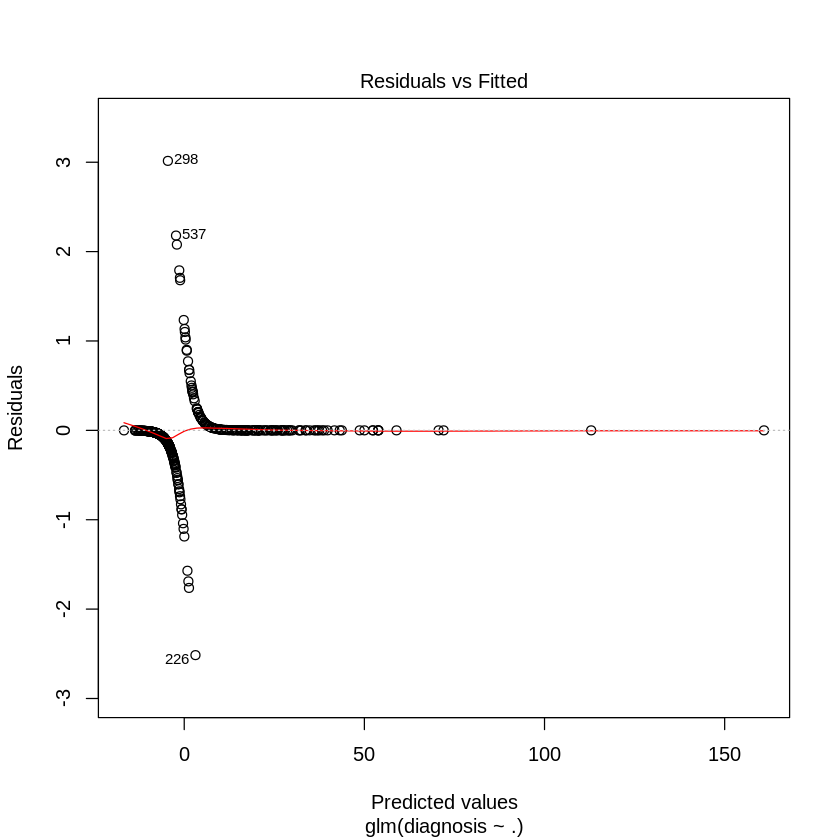

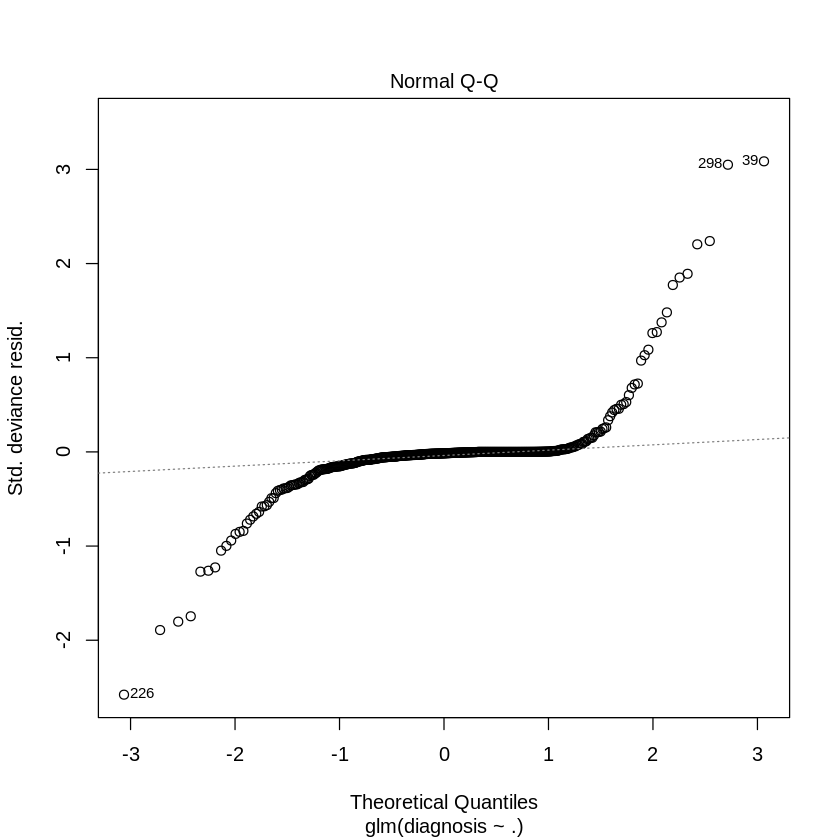

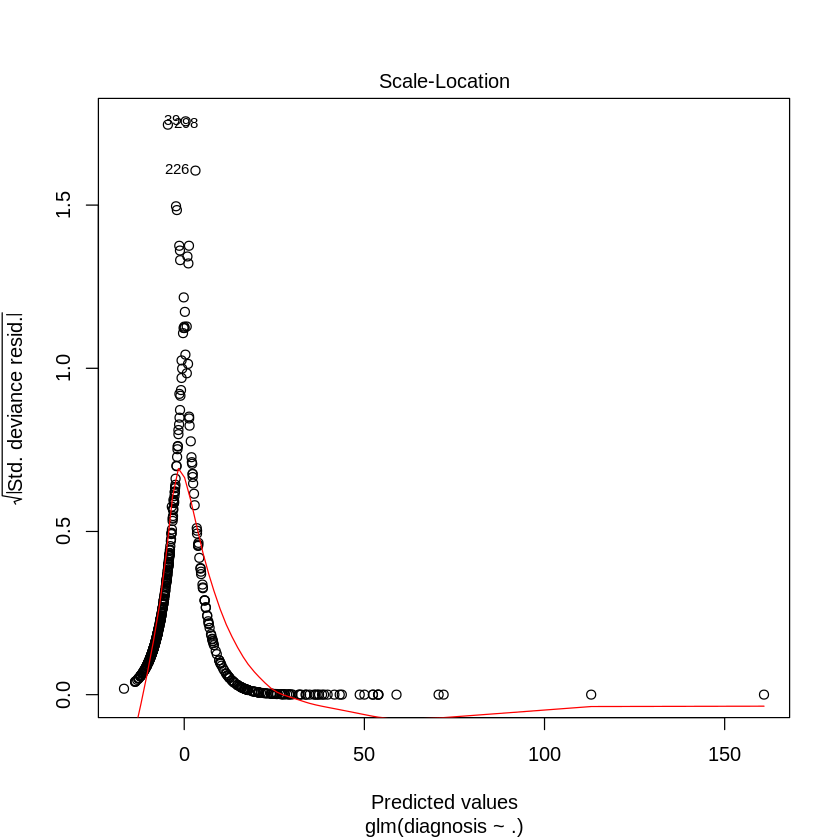

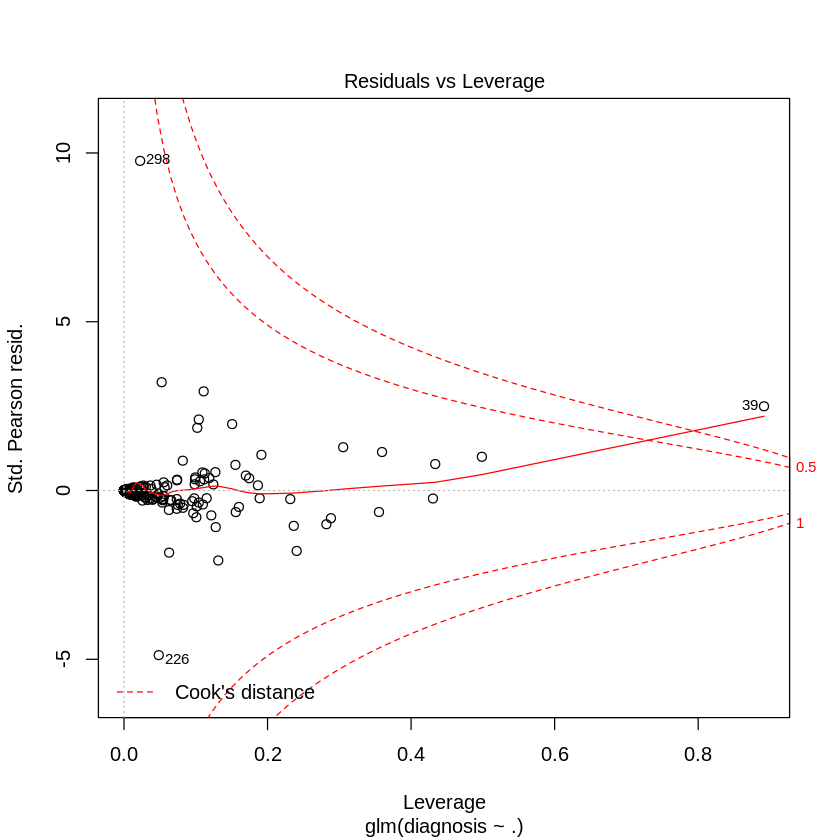

In [37]:
glmfit <- glm(diagnosis~.,data=training_refine,family=binomial)
summary(glmfit)
plot(glmfit)

In [38]:
glm.predict <- predict(glmfit,testing_refine[,-12], type="response")
glm.predict <- ifelse(glm.predict>0.5,"Maglinant","Benign")
dim(glm.predict)
head(glm.predict)
head(testing$diagnosis)

NULL

8          15          16          24          25          27 
"Maglinant" "Maglinant" "Maglinant" "Maglinant" "Maglinant" "Maglinant"

[1] Malignant Malignant Malignant Malignant Malignant Malignant
Levels: Benign Malignant

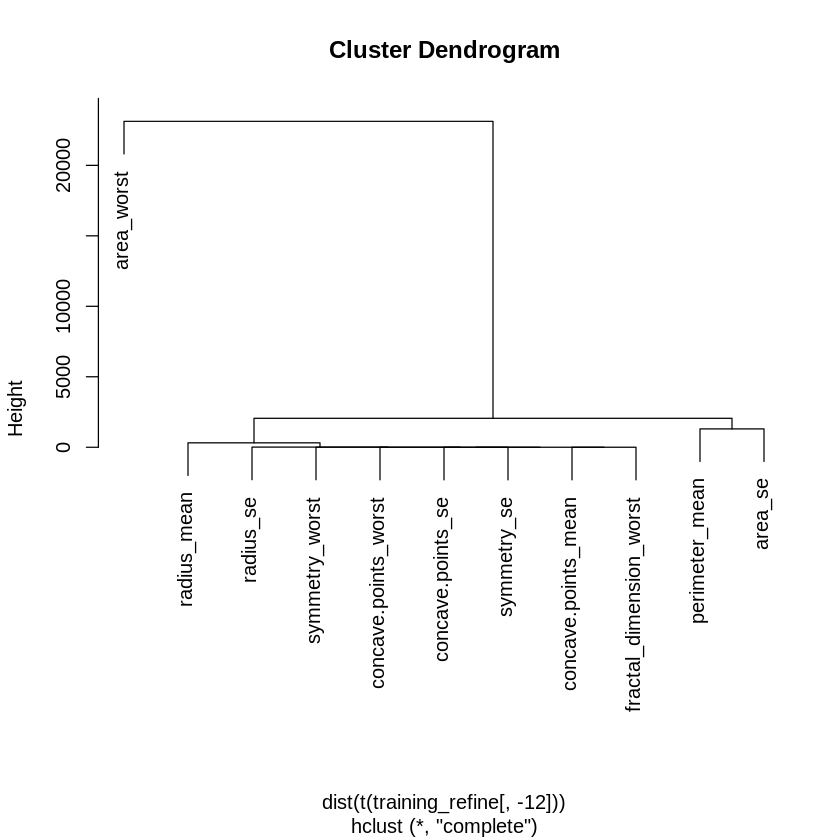

In [39]:
data.hclust <- hclust(dist(t(training_refine[,-12])),method="complete")
plot(data.hclust)

In [40]:
print("Variable Importance ")
order <- varImp(glmfit,scale=FALSE)

order

[1] "Variable Importance "


,Overall
radius_mean,0.42607222
perimeter_mean,0.06136957
concave.points_mean,0.88814786
radius_se,0.82803575
area_se,1.43877846
concave.points_se,0.09395425
symmetry_se,1.90228818
area_worst,2.22385509
concave.points_worst,1.61896597
symmetry_worst,2.81985779


In [43]:
install.packages("ranger")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [44]:
rf_Control <- trainControl(method="cv",
                            number = 5,
                            preProcOptions = list(thresh = 0.99), # threshold for pca preprocess
                            classProbs = TRUE,
                            summaryFunction = twoClassSummary)

rf_fit <- train(diagnosis~.,
                   training_refine,
                   method="ranger",
                   metric="ROC",
                   #tuneLength=10,
                   #tuneGrid = expand.grid(mtry = c(2, 3, 6)),
                   preProcess = c('center', 'scale'),
                   trControl=rf_Control)
rf_pred <- predict(rf_fit, testing_refine)
rf_matrix <- confusionMatrix(rf_pred, testing_refine$diagnosis)
rf_matrix

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign        70         4
  Malignant      1        38
                                          
               Accuracy : 0.9558          
                 95% CI : (0.8998, 0.9855)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9039          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.9859          
            Specificity : 0.9048          
         Pos Pred Value : 0.9459          
         Neg Pred Value : 0.9744          
             Prevalence : 0.6283          
         Detection Rate : 0.6195          
   Detection Prevalence : 0.6549          
      Balanced Accuracy : 0.9453          
                                          
       'Positive' Class : Benign          